Homework 4: Sentiment Analysis
----

Names & Sections
----
Names: __Alex Kramer (6120 Student)__

Train a Naive Bayes Model (30 points)
----

Using `nltk`'s `NaiveBayesClassifier` class, train a Naive Bayes classifier using a Bag of Words as features.
https://www.nltk.org/_modules/nltk/classify/naivebayes.html

In [1]:
# our utility functions
# RESTART your jupyter notebook kernel if you make changes to this file
import sentiment_utils as sutils

# nltk for Naive Bayes and metrics
import nltk
import nltk.classify.util
from nltk.metrics.scores import (precision, recall, f_measure, accuracy)
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords

# some potentially helpful data structures from collections
from collections import defaultdict, Counter

# so that we can make plots
import matplotlib.pyplot as plt
# if you want to use seaborn to make plots
import seaborn as sns

from sklearn import metrics

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexkramer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

In [3]:
# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)

In [4]:
# Printing Data - Exploration - Ignore This!
print('Train Tups: \n')
for t in train_tups:
    print(t[:2])
print('\n\nDev Tups: \n')
for d in dev_tups:
    print(d[:2])

Train Tups: 

[['Van', 'Dien', 'must', 'cringe', 'with', 'embarrassment', 'at', 'the', 'memory', 'of', 'this', 'ludicrously', 'poor', 'film', ',', 'as', 'indeed', 'must', 'every', 'single', 'individual', 'involved', '.', 'To', 'be', 'honest', 'I', 'am', 'rather', 'embarrassed', 'to', 'admit', 'I', 'watched', 'it', 'from', 'start', 'to', 'finish', '.', 'Production', 'values', 'are', 'somewhere', 'between', 'the', 'original', 'series', 'of', "'Crossroads", "'", 'and', "'Prisoner", 'Cell', 'Block', 'H', "'", '.', 'Most', 'five', 'year', 'olds', 'would', 'be', 'able', 'to', 'come', 'up', 'with', 'more', 'realistic', 'dialogue', 'and', 'a', 'more', 'plausible', 'plot', '.', 'As', 'for', 'the', 'acting', 'performances', ',', 'if', 'you', 'can', 'imagine', 'the', 'most', 'rubbish', 'porno', 'you', 'have', 'ever', 'seen', '-', 'one', 'of', 'those', 'ones', 'where', 'the', 'action', 'is', 'padded', 'out', 'with', 'some', 'interminable', "'story", "'", 'to', 'explain', 'how', 'some', 'pouting', 

In [4]:
nltk.download('stopwords')
def make_feats(data_tups):
    feats_set = []
    for text in data_tups[0]:
        feats_set.append(word_feats(preprocessing(text)))
    return feats_set, data_tups[1]

def preprocessing(words):
    # preprocess text
    # create list of words
    return [word.lower() for word in words if word.lower() not in stopwords.words("english")]

def word_feats(words, multinomial=False):
    my_dict = defaultdict(int)

    if multinomial:
        for word in words:
            my_dict[word] += 1
    else:
        # binary case
        for word in words:
            if my_dict[word] == 0:
                my_dict[word] = 1
    return my_dict 
    # feature set

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexkramer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
train_tups_feats = make_feats(train_tups) #binary
#train_tups_feats = make_feats(train_tups) # multi
dev_tups_feats = make_feats(dev_tups) # binary
#dev_tups_feats = make_feats(dev_tups) # multi

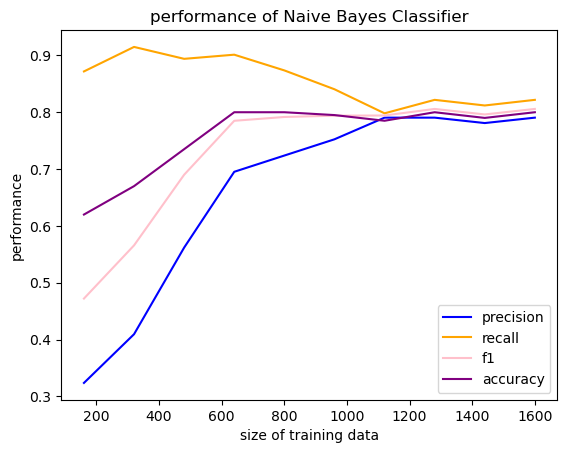

In [11]:
# create a graph of your classifier's performance on the dev set as a function of the amount of training data
# the x-axis should be the amount of training data (as a percentage of the total training data)
# the y-axis should be the performance of the classifier on the dev set
# the graph should have 4 lines, one for each of precision, recall, f1, and accuracy
# the graph should have a legend, title, and axis labels

# takes approximately 3.5sec to run on Felix's computer

sutils._create_training_graph(sutils.get_prfa, train_tups_feats, dev_tups_feats, nltk.NaiveBayesClassifier, "Naive Bayes Classifier", '../NB.png', verbose=False)

Test your model using both a __binarized__ and a __multinomial__ BoW. Use whichever one gives you a better final f1 score on the dev set to produce your graphs.

- f1 score binarized: __0.81 __
- f1 score multinomial: __0.79__

## Twitter Dataset

In [2]:
data = sutils.generate_tuples_from_file("twitter.csv", delin=",", header=["id","label","tweet"], hasheading=True)

# split the data into train set and dev set, this process is not random
X_train, X_dev, y_train, y_dev = sutils.train_dev_split(data, train_ratio=0.8)


In [6]:
print(len(X_train))
print(y_train[0])

21820
0


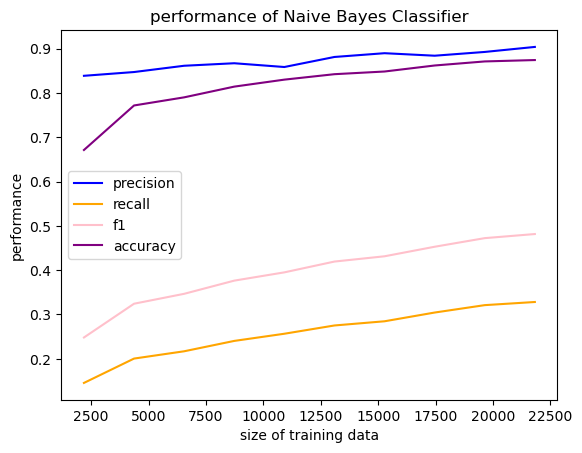

In [7]:
train_tups_feats = make_feats((X_train, y_train)) #binary
#train_tups_feats = make_feats(train_tups) # multi
dev_tups_feats = make_feats((X_dev, y_dev)) # binary
#dev_tups_feats = make_feats(dev_tups) # multi

sutils._create_training_graph(sutils.get_prfa, train_tups_feats, dev_tups_feats, nltk.NaiveBayesClassifier, "Naive Bayes Classifier", '../NB.png', verbose=False)